In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential

from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt


In [4]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [5]:
data=datasets.load_digits()
x=data.images
y=data.target

In [7]:
x=x.reshape((x.shape[0],8,8,1))
x=x.astype('float32')/255
y=to_categorical(y)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
earlystop=EarlyStopping(monitor='val_loss',patience=10)
best_weights=ModelCheckpoint('best_weights.h5',save_best_only=True,monitor='val_loss',mode='min')

In [17]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),callbacks=[earlystop,best_weights])

Epoch 1/50
45/45 [==============================] - 1s 8ms/step - loss: 2.2901 - accuracy: 0.2032 - val_loss: 2.2718 - val_accuracy: 0.3778
Epoch 2/50
28/45 [=================>............] - ETA: 0s - loss: 2.2480 - accuracy: 0.3504

C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/45 [==============================] - 0s 4ms/step - loss: 2.2305 - accuracy: 0.3737 - val_loss: 2.1816 - val_accuracy: 0.5028
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 2.0689 - accuracy: 0.5595 - val_loss: 1.9512 - val_accuracy: 0.5417
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 1.7584 - accuracy: 0.6458 - val_loss: 1.5718 - val_accuracy: 0.7194
Epoch 5/50
45/45 [==============================] - 0s 3ms/step - loss: 1.3656 - accuracy: 0.7634 - val_loss: 1.1821 - val_accuracy: 0.8194
Epoch 6/50
45/45 [==============================] - 0s 3ms/step - loss: 1.0316 - accuracy: 0.8163 - val_loss: 0.9040 - val_accuracy: 0.8722
Epoch 7/50
45/45 [==============================] - 0s 4ms/step - loss: 0.7972 - accuracy: 0.8629 - val_loss: 0.6994 - val_accuracy: 0.8944
Epoch 8/50
45/45 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.8852 - val_loss: 0.5798 - val_accuracy: 0.8722
Epoch 9/50
45/45 [=============

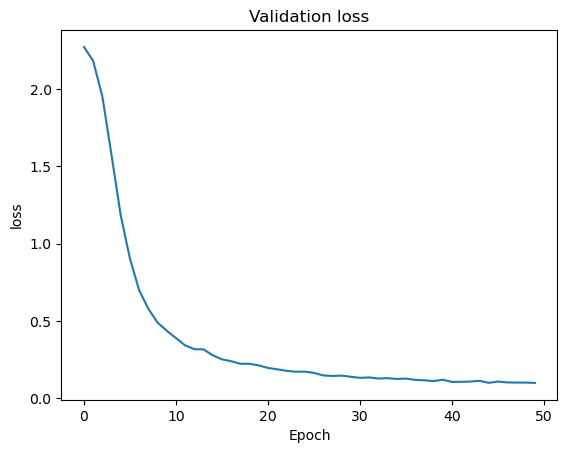

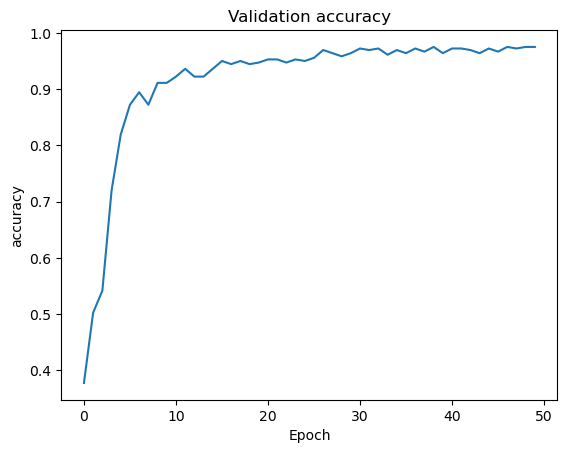

In [23]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.show()

In [24]:
model.load_weights("best_weights.h5")

In [26]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("Test loss: ",test_loss)
print("Test Accuracy: ",test_acc)

Test loss:  0.1004713773727417
Test Accuracy:  0.9750000238418579
